# CEO-Request Challenge

## 1. Summary of Problem Statement

❓ **How could Olist improve its profit** ❓

### P&L Rules

#### Revenues  
**Sales fees:** Olist takes a **10% cut** on the product price (excl. freight) of each order delivered  
**Subscription fees:** Olist charges **80 BRL per month** per seller

#### Costs
_Estimated_ **reputation costs** of orders with bad reviews (<= 3 stars)  

💡 In the long term, bad customer experience has business implications: low repeat rate, immediate customer support cost, refunds or unfavorable word of mouth communication. We make an assumption about the monetary cost for each bad review:
```python
# review_score: cost(BRL)
{'1 star': 100
 '2 stars': 50
 '3 stars': 40
 '4 stars': 0
 '5 stars': 0}
```

**IT costs:** Olist's **total cumulated IT Costs** scale with the square root of the total number of sellers that have ever joined the platform, as well as with the square root of the total cumulated number of items that were ever sold.

$IT\_costs = \alpha * \sqrt{n\_sellers} + \beta * \sqrt{n\_items}$  
Olist's data team gave us the following values for these scaling parameters:
- $\alpha = 3157.27$
- $\beta = 978.23$

💡 Both the number of sellers to manage and the number of sales transaction are costly for IT systems.  
💡 Yet square roots reflect scale-effects: IT-system are often more efficient as they grow bigger.  
💡 Alpha > Beta means that Olist has a lower IT Cost with few sellers selling a lot of items rather than the opposite  
- with **1000 sellers** and a total of **100 items** sold, the total IT cost accumulates to 109,624 BRL
- with **100 sellers** and a total of **1000 items** sold, the total IT cost accumulates to 62,507 BRL

Finally, The IT department also told you that since the birth of the marketplace, cumulated IT costs have amounted to **500,000 BRL**.

### Key Findings, so far

- `wait_time` is the most significant factor behind low review scores.
- `wait_time` is made up of seller's `delay_to_carrier` + `carrier_delivery_time`.
- Because the carrier's delivery time is out of Olist's direct control, improving it is not a quick-win recommendation.
- On the contrary, a better selection of `sellers` can positively impact the `delay_to_carrier` and reduce the number of bad `review_scores` on Olist.
- Comments in the bad reviews showed that some were linked to the seller or to the product itself.

💡 We recommend you to start with the the guided seller analysis in part 2 below.

💪 But feel free to investigate other hypothesis instead with part 3.

## 2. Should Olist remove under-performing sellers from its marketplace? 🕵🏻
*(recommended)*

To analyze the impact of removing the worst sellers from Olist's marketplace, we will perform a **what-if analysis**

👉 **What would have happened if Olist had never accepted these sellers in the first place?**  

*(In practice, it's hard to know in advance who is a good seller, but let's start with this approach and iterate later).*

### 2.1 Data Preparation

Compute, for each `seller_id`, and cumulated since the beginning:
- the `revenues` the seller brings
- the `review_costs` associated with the seller's bad reviews
- the resulting `profits` (revenues - costs)

👉 Write down a step-by-step strategy to create the DataFrame you need.


⚠️ Don't start from scratch, update your existing package! 😉

Starting from the `Seller` class of your `olist` package:

Edit the `get_training_data` method so that the DataFrame it returns contains the fields:
- `revenues`: sum of subscription and sales fees revenues
- `cost_of_reviews`: sum of costs associated with bad reviews
- `profits`: `revenues` - `cost_of_reviews`

### 2.2 What-if Analysis

👉 Time to perform the actual analysis, here are our steps:  

1️⃣ Write a function that will calculate IT costs based on two parameters: number of sellers and number of items.

2️⃣ Load the sellers data and sort them by decreasing profits (before IT costs).

3️⃣ Calculate profits:
   - Calculate the cumulative profits for each row.
   - Calculate the cumulative IT costs for each row using the function you defined before.
   - Calculate the cumulative net profit for each row.

4️⃣ Plot your results, and analyze them.

5️⃣ Determine the optimum number of sellers to keep, based on profits before and after IT costs. (Hint: look up `np.argmax`). What would have been the impact on:
   - Net profit after IT costs?
   - Net profit before IT costs
   - IT costs?
   - Total revenues?
   - Number of sellers?
   - Number of items sold?

6️⃣ How important were the IT costs in your analysis?

In [3]:
from olist.seller import Seller
seller = Seller()

In [2]:
import numpy as np

In [21]:
print("Available columns:", seller_data.columns.tolist())

Available columns: ['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier', 'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist', 'n_orders', 'quantity', 'quantity_per_order', 'sales']


## 3. Investigate other Approaches 🕵️
*(optional)*

- Should Olist remove the worst performing products / categories from its marketplace entirely?
- Should Olist remove only consistently underperforming sellers, after a honeymoon period of a few months?
- Should Olist enforce sellers to include certain information on their product listings?
- Should Olist ask customers for purchase confirmation at certain times of day?
- Should Olist restrict seller/customer pairs between certain states to avoid delays?
- Should Olist acquire new sellers, with some cost assumptions to be suggested?
- ...


## Your turn!

🧺 Keep this notebook tidy! 

🗣 📊 You will present your insights to your favorite TA at the end of this `Communicate` unit 💪

Starting Olist analysis...
IT costs with 1000 sellers and 100 items: 109623.94 BRL
IT costs with 100 sellers and 1000 items: 62507.05 BRL

Loading raw data...
Getting seller features...
Getting review data...
Calculating review costs...
Merging all seller data...
Calculating revenues and profits...
Total number of sellers: 3095
Columns in sellers_data: ['seller_id', 'seller_city', 'seller_state', 'delay_to_carrier', 'wait_time', 'date_first_sale', 'date_last_sale', 'months_on_olist', 'n_orders', 'quantity', 'quantity_per_order', 'sales', 'share_of_one_stars', 'share_of_five_stars', 'review_score', 'cost_of_reviews', 'subscription_revenue', 'sales_fee_revenue', 'revenues', 'profits']

Top 10 sellers by profit:
                          seller_id    profits   revenues  cost_of_reviews
0  53243585a1d6dc2643021fd1853d8905  18067.605  23237.605           5170.0
1  7e93a43ef30c4f03f38b393420bc753a  14623.187  19323.187           4700.0
2  fa1c13f2614d7b5c4749cbc52fecda94  14494.203  21004.20

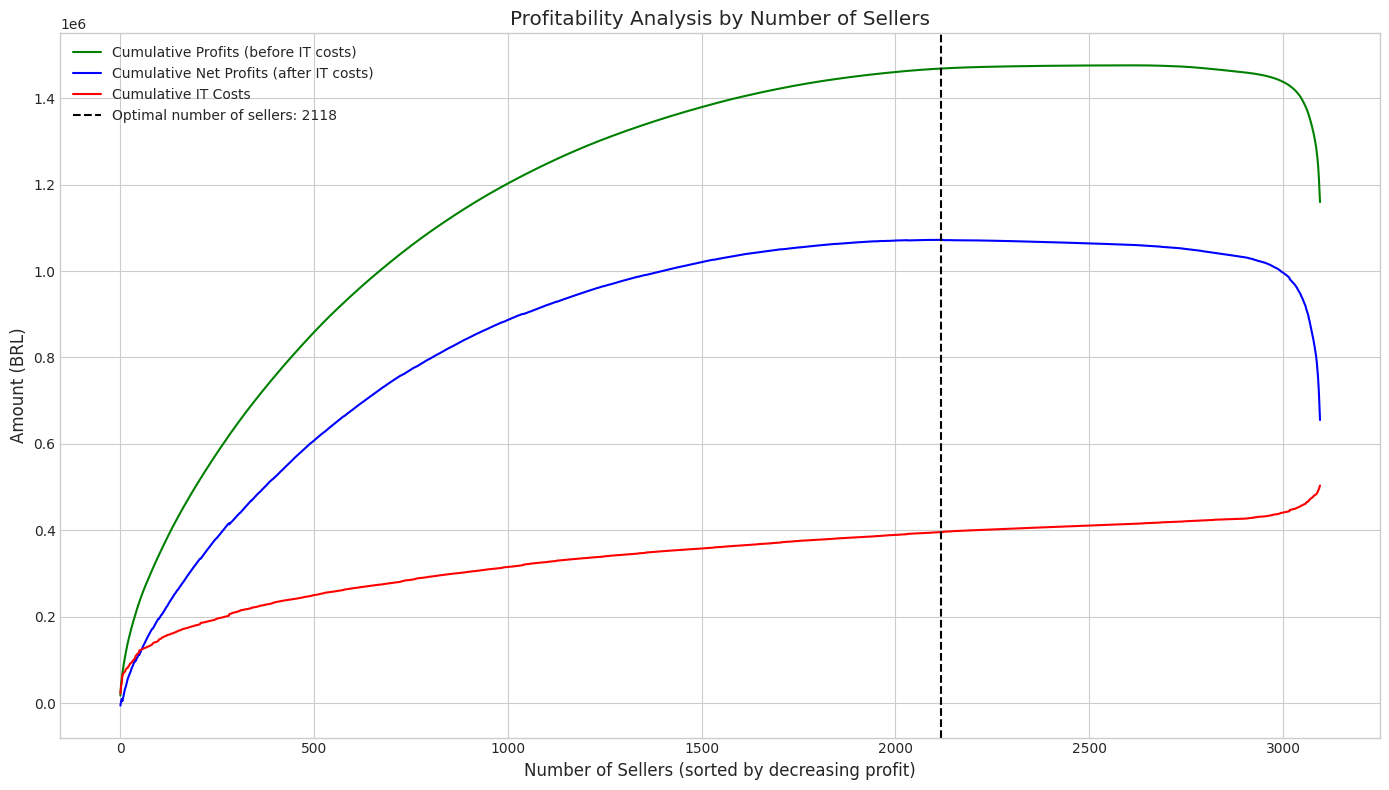


Impact Analysis:
Net profit after IT costs: 1,072,006.26 BRL (vs. 655,359.86 BRL with all sellers)
Profit improvement: 416,646.41 BRL
Percentage improvement: 63.58%

Net profit before IT costs: 1,468,192.40 BRL (vs. 1,159,334.37 BRL with all sellers)
IT costs: 396,186.14 BRL (vs. 503,974.51 BRL with all sellers)
Total revenues: 2,284,822.40 BRL (vs. 2,791,484.37 BRL with all sellers)
Items sold: 65,775 (vs. 112,650 with all sellers)
Percentage of revenue retained: 81.85%
Percentage of items sold retained: 58.39%

Comparison of Kept vs Removed Sellers (Average Values):
         review_score  delay_to_carrier  wait_time  quantity_per_order  \
status                                                                   
Kept         4.173158          0.252373  11.901043            1.164652   
Removed      3.600075          0.773640  12.799913            1.154132   

               sales     profits  
status                            
Kept     4821.635524  693.197547  
Removed  3458.976111 -

In [ ]:
# Manual Olist Analysis Script
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from olist.seller import Seller
from olist.data import Olist
from olist.order import Order

# Set plot style
plt.style.use('ggplot')
sns.set_style('whitegrid')

print("Starting Olist analysis...")

# Define the IT cost calculation function
def calculate_it_costs(n_sellers, n_items):
    """Calculate IT costs based on the number of sellers and items"""
    alpha = 3157.27
    beta = 978.23
    return alpha * np.sqrt(n_sellers) + beta * np.sqrt(n_items)

# Test the IT cost function
print(f"IT costs with 1000 sellers and 100 items: {calculate_it_costs(1000, 100):.2f} BRL")
print(f"IT costs with 100 sellers and 1000 items: {calculate_it_costs(100, 1000):.2f} BRL")

# Initialize classes
seller = Seller()
olist = Olist()
order = Order()

# Get raw data
print("\nLoading raw data...")
data = olist.get_data()

# Get seller features
print("Getting seller features...")
seller_features = seller.get_seller_features()
seller_delay = seller.get_seller_delay_wait_time()
seller_dates = seller.get_active_dates().reset_index()
seller_quantity = seller.get_quantity()
seller_sales = seller.get_sales().reset_index()

# Get review data
print("Getting review data...")
reviews = order.get_review_score()
order_items = data['order_items'][['order_id', 'seller_id']].drop_duplicates()
seller_reviews = order_items.merge(reviews, on='order_id')

# Calculate review costs
print("Calculating review costs...")
review_cost_map = {
    1: 100,  # 1 star: 100 BRL
    2: 50,   # 2 stars: 50 BRL
    3: 40,   # 3 stars: 40 BRL
    4: 0,    # 4 stars: 0 BRL
    5: 0     # 5 stars: 0 BRL
}
seller_reviews['review_cost'] = seller_reviews['review_score'].map(review_cost_map)
review_costs = seller_reviews.groupby('seller_id')['review_cost'].sum().reset_index()
review_costs.columns = ['seller_id', 'cost_of_reviews']

# Calculate review scores
review_scores = seller_reviews.groupby('seller_id', as_index=False).agg({
    'dim_is_one_star': 'mean',
    'dim_is_five_star': 'mean',
    'review_score': 'mean'
})
review_scores.columns = ['seller_id', 'share_of_one_stars', 'share_of_five_stars', 'review_score']

# Merge all seller data
print("Merging all seller data...")
sellers_data = (
    seller_features
    .merge(seller_delay, on='seller_id', how='left')
    .merge(seller_dates, on='seller_id', how='left')
    .merge(seller_quantity, on='seller_id', how='left')
    .merge(seller_sales, on='seller_id', how='left')
    .merge(review_scores, on='seller_id', how='left')
    .merge(review_costs, on='seller_id', how='left')
)

# Fill NaN values
sellers_data['cost_of_reviews'] = sellers_data['cost_of_reviews'].fillna(0)
sellers_data['review_score'] = sellers_data['review_score'].fillna(0)
sellers_data['share_of_one_stars'] = sellers_data['share_of_one_stars'].fillna(0)
sellers_data['share_of_five_stars'] = sellers_data['share_of_five_stars'].fillna(0)

# Calculate revenues and profits
print("Calculating revenues and profits...")
sellers_data['subscription_revenue'] = sellers_data['months_on_olist'] * 80
sellers_data['sales_fee_revenue'] = sellers_data['sales'] * 0.1
sellers_data['revenues'] = sellers_data['subscription_revenue'] + sellers_data['sales_fee_revenue']
sellers_data['profits'] = sellers_data['revenues'] - sellers_data['cost_of_reviews']

# Sort by decreasing profits
sellers_data = sellers_data.sort_values('profits', ascending=False).reset_index(drop=True)

print(f"Total number of sellers: {len(sellers_data)}")
print(f"Columns in sellers_data: {sellers_data.columns.tolist()}")

# Display the top 10 sellers by profit
print("\nTop 10 sellers by profit:")
print(sellers_data.head(10)[['seller_id', 'profits', 'revenues', 'cost_of_reviews']])

# Calculate cumulative values
n_sellers_array = range(1, len(sellers_data) + 1)
sellers_data['cumulative_profits'] = sellers_data['profits'].cumsum()
sellers_data['cumulative_revenues'] = sellers_data['revenues'].cumsum()
sellers_data['cumulative_review_costs'] = sellers_data['cost_of_reviews'].cumsum()
sellers_data['cumulative_items'] = sellers_data['quantity'].cumsum()

# Calculate IT costs for each number of sellers
print("Calculating IT costs...")
it_costs_array = []
for i in range(len(sellers_data)):
    n_sellers = i + 1
    n_items = sellers_data['cumulative_items'].iloc[i]
    it_costs = calculate_it_costs(n_sellers, n_items)
    it_costs_array.append(it_costs)

sellers_data['cumulative_it_costs'] = it_costs_array
sellers_data['cumulative_net_profit'] = sellers_data['cumulative_profits'] - sellers_data['cumulative_it_costs']

# Find the optimal number of sellers
optimal_seller_index = sellers_data['cumulative_net_profit'].idxmax()
optimal_seller_count = optimal_seller_index + 1

print(f"\nOptimal number of sellers: {optimal_seller_count} out of {len(sellers_data)} total sellers")

# Plot results
print("Creating plots...")
plt.figure(figsize=(14, 8))

plt.plot(n_sellers_array, sellers_data['cumulative_profits'],
         label='Cumulative Profits (before IT costs)', color='green')
plt.plot(n_sellers_array, sellers_data['cumulative_net_profit'],
         label='Cumulative Net Profits (after IT costs)', color='blue')
plt.plot(n_sellers_array, sellers_data['cumulative_it_costs'],
         label='Cumulative IT Costs', color='red')

plt.axvline(x=optimal_seller_count, color='black', linestyle='--',
            label=f'Optimal number of sellers: {optimal_seller_count}')

plt.xlabel('Number of Sellers (sorted by decreasing profit)')
plt.ylabel('Amount (BRL)')
plt.title('Profitability Analysis by Number of Sellers')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Impact analysis
print("\nImpact Analysis:")
optimal_data = sellers_data.iloc[optimal_seller_index]
total_data = sellers_data.iloc[-1]

print(f"Net profit after IT costs: {optimal_data['cumulative_net_profit']:,.2f} BRL (vs. {total_data['cumulative_net_profit']:,.2f} BRL with all sellers)")
print(f"Profit improvement: {optimal_data['cumulative_net_profit'] - total_data['cumulative_net_profit']:,.2f} BRL")

if total_data['cumulative_net_profit'] > 0:
    pct_improvement = ((optimal_data['cumulative_net_profit'] / total_data['cumulative_net_profit']) - 1) * 100
    print(f"Percentage improvement: {pct_improvement:.2f}%")
else:
    print("Percentage improvement: N/A (current net profit is negative)")

print(f"\nNet profit before IT costs: {optimal_data['cumulative_profits']:,.2f} BRL (vs. {total_data['cumulative_profits']:,.2f} BRL with all sellers)")
print(f"IT costs: {optimal_data['cumulative_it_costs']:,.2f} BRL (vs. {total_data['cumulative_it_costs']:,.2f} BRL with all sellers)")
print(f"Total revenues: {optimal_data['cumulative_revenues']:,.2f} BRL (vs. {total_data['cumulative_revenues']:,.2f} BRL with all sellers)")
print(f"Items sold: {optimal_data['cumulative_items']:,} (vs. {total_data['cumulative_items']:,} with all sellers)")
print(f"Percentage of revenue retained: {(optimal_data['cumulative_revenues'] / total_data['cumulative_revenues']) * 100:.2f}%")
print(f"Percentage of items sold retained: {(optimal_data['cumulative_items'] / total_data['cumulative_items']) * 100:.2f}%")

# Compare kept vs removed sellers
kept_sellers = sellers_data.iloc[:optimal_seller_count].copy()
removed_sellers = sellers_data.iloc[optimal_seller_count:].copy()
kept_sellers['status'] = 'Kept'
removed_sellers['status'] = 'Removed'
comparison_df = pd.concat([kept_sellers, removed_sellers])

# Compare key metrics
metrics_to_compare = ['review_score', 'delay_to_carrier', 'wait_time',
                     'quantity_per_order', 'sales', 'profits']

print("\nComparison of Kept vs Removed Sellers (Average Values):")
print(comparison_df.groupby('status')[metrics_to_compare].mean())

print("\nAnalysis complete!")